In [0]:
from pandas_datareader import DataReader
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [18]:
from google.colab import files
uploaded = files.upload()

Saving listings.xlsx to listings.xlsx


In [0]:
ty10=DataReader('DGS10','fred',date(1962,1,1))

In [43]:
ty10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15018 entries, 1962-01-02 to 2019-07-25
Data columns (total 1 columns):
DGS10    14376 non-null float64
dtypes: float64(1)
memory usage: 234.7 KB


In [44]:
ty10.describe()

,DGS10
count,14376.000000
mean,6.149903
std,2.884751
min,1.370000
25%,4.080000
50%,5.900000
75%,7.800000
max,15.840000


<function matplotlib.pyplot.tight_layout>

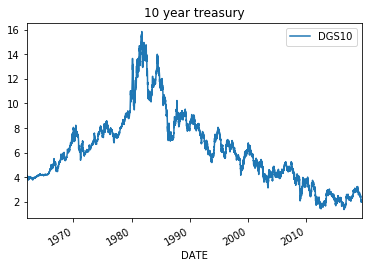

In [45]:
ty10.dropna(inplace=True)
ty10.plot(title='10 year treasury')
plt.tight_layout

In [0]:
import seaborn as sns

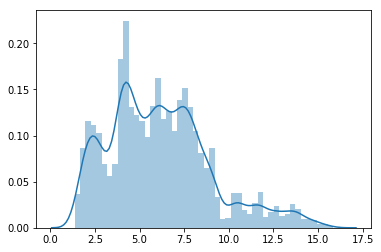

In [47]:
sns.distplot(ty10)

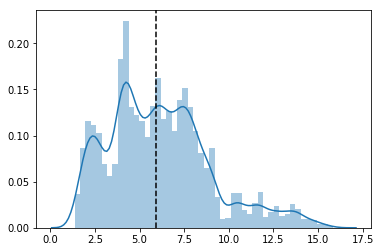

In [48]:
ax=sns.distplot(ty10)
ax.axvline(ty10['DGS10'].median(),color='k',ls='--')

seaborn is a Python visualization library for statistical data visualization based on matplotlib.

By default, the distplot() function in the seaborn package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a kernel density estimation (KDE), or smoothed histogram. You can also use distplot() to create another kind of graph called a rugplot, which adds markers at the bottom of the chart to indicate the density of observations along the x axis.

In [49]:
# Import seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(income.describe())
# Print the summary statistics for income


# Plot a basic histogram of income per capita
print(sns.distplot(income['Income per Capita']))
# Show the plot
plt.show()

# Plot a rugplot
sns.distplot(income['Income per Capita'], bins='50', kde=False, rug = True)

# Show the plot
plt.show()

NameError: ignored

In [0]:
index2.svg

In [0]:
# Load the file into growth
growth = pd.read_csv('income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.show()

In [0]:
index3.svg

Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are .dropna() and .fillna(). You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using .quantile() to a particular column.you will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values.

In [0]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

In [0]:
index4.svg

In [0]:
naz=pd.read_excel('listings.xlsx',sheet_name='nasdaq',na_values='n/a')

In [66]:
naz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 8 columns):
Symbol           3525 non-null object
Name             3525 non-null object
LastSale         3483 non-null float64
MarketCap        3211 non-null object
IPOyear          1643 non-null float64
Sector           3013 non-null object
industry         3013 non-null object
Summary Quote    3525 non-null object
dtypes: float64(2), object(6)
memory usage: 220.4+ KB


In [67]:
naz.describe()

,LastSale,IPOyear
count,3483.000000,1643.000000
mean,31.864169,2009.705417
std,72.327995,9.896401
min,0.000200,1972.000000
25%,4.425000,2004.000000
50%,15.870000,2014.000000
75%,34.630000,2017.000000
max,2020.990000,2019.000000


In [0]:
mx=pd.read_excel('listings.xlsx',sheet_name='amex',na_values='n/a')

In [77]:
mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
Symbol           310 non-null object
Name             310 non-null object
LastSale         296 non-null float64
MarketCap        310 non-null float64
ADR TSO          0 non-null float64
IPOyear          92 non-null float64
Sector           221 non-null object
Industry         221 non-null object
Summary Quote    310 non-null object
dtypes: float64(4), object(5)
memory usage: 21.9+ KB


In [0]:
amx=mx.Sector.nunique()


In [79]:
amx

12

In [82]:
dnaz=naz.industry.nunique()

AttributeError: ignored

In [83]:
dnaz

NameError: ignored

In [84]:
mx.apply(lambda x:x.nunique())

Symbol           310
Name             273
LastSale         278
MarketCap        262
ADR TSO            0
IPOyear           23
Sector            12
Industry          66
Summary Quote    310
dtype: int64

In [85]:
mx.Sector.value_counts()

Basic Industries         48
Health Care              44
Consumer Services        26
Energy                   24
Capital Goods            20
Finance                  18
Technology               17
Consumer Non-Durables     9
Public Utilities          6
Miscellaneous             5
Consumer Durables         3
Transportation            1
Name: Sector, dtype: int64

In [88]:
mx['IPOyear'].value_counts() # carefully check when applying value_count fn and nunique as it reassigns everythings. thats why i have placed 2 names

2017.0    15
2015.0    10
2018.0     7
2002.0     6
2003.0     5
2004.0     5
2014.0     5
1993.0     5
1999.0     4
2011.0     3
1988.0     3
2006.0     3
2007.0     3
2019.0     3
1997.0     2
1998.0     2
2005.0     2
2016.0     2
1992.0     2
1986.0     2
1996.0     1
2013.0     1
1987.0     1
Name: IPOyear, dtype: int64

In [0]:
ipo=mx['IPOyear'].dropna().astype(int).value_counts()#changes ipoyears float type to int due to missing values

In [91]:
ipo

2017    15
2015    10
2018     7
2002     6
2004     5
2014     5
1993     5
2003     5
1999     4
1988     3
2019     3
2006     3
2007     3
2011     3
2005     2
1998     2
1997     2
1992     2
2016     2
1986     2
1996     1
2013     1
1987     1
Name: IPOyear, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

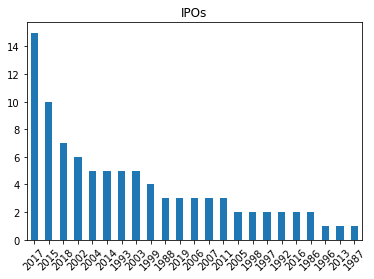

In [92]:
ipo.plot(kind='bar',title='IPOs')
plt.xticks(rotation=45)

In [0]:
# these next ones are to e done manually also

A categorical variable is a variable that is one of a limited number of values based on some qualitative property. A frequency distribution is a representation of the number of times that a categorical variable occurs.

In [95]:
# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors = listings[exchange].Sector.value_counts()
    # Sort in descending order and plot
sectors.sort_values(ascending=False).plot(kind='bar')
    # Show the plot
plt.show()

NameError: ignored

In [0]:
index5.svg

In [0]:
# Create lists
exchanges = ['amex', 'nasdaq', 'nyse']
all_listings = []

# Use for loop to create listing_data
for exchange in exchanges:
    all_listings.append(listings[exchange])
    
# Combine DataFrames
listing_data = pd.concat(all_listings)

# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']

# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(ascending=True).plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [0]:
index6.svg

In [98]:
mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
Symbol           310 non-null object
Name             310 non-null object
LastSale         296 non-null float64
MarketCap        310 non-null float64
ADR TSO          0 non-null float64
IPOyear          92 non-null float64
Sector           221 non-null object
Industry         221 non-null object
Summary Quote    310 non-null object
dtypes: float64(4), object(5)
memory usage: 21.9+ KB


In [0]:
mx['MC']=mx['MarketCap'].div(1e6)

In [0]:
mx1=mx.drop(['MarketCap'],axis=1)

In [0]:
mx_bsec=mx.groupby('Sector')

In [102]:
for sector, data in mx_bsec:
  print(sector,data.MC.mean())

Basic Industries 346.9478398997979
Capital Goods 63.54558364161501
Consumer Durables 327.4901527933334
Consumer Non-Durables 125.1783654009889
Consumer Services 134.94286354448073
Energy 1060.4250747113708
Finance 525.0043400541556
Health Care 105.70707254866369
Miscellaneous 138.90932830672
Public Utilities 6489.342854550167
Technology 70.45449233823528
Transportation 262.73634880000003


In [0]:
mc_bsec=mx_bsec.MC.median()

In [104]:
mc_bsec

Sector
Basic Industries         171.360294
Capital Goods             42.297030
Consumer Durables         14.975175
Consumer Non-Durables     96.301463
Consumer Services         62.030410
Energy                    45.802290
Finance                   92.871024
Health Care               31.825418
Miscellaneous             47.499312
Public Utilities          83.064072
Technology                37.536203
Transportation           262.736349
Name: MC, dtype: float64

In [0]:
mc_bsec1=mx_bsec.MC.mean()

In [106]:
mc_bsec1

Sector
Basic Industries          346.947840
Capital Goods              63.545584
Consumer Durables         327.490153
Consumer Non-Durables     125.178365
Consumer Services         134.942864
Energy                   1060.425075
Finance                   525.004340
Health Care               105.707073
Miscellaneous             138.909328
Public Utilities         6489.342855
Technology                 70.454492
Transportation            262.736349
Name: MC, dtype: float64

In [109]:
mx_bsec.mean()

,LastSale,MarketCap,ADR TSO,IPOyear,MC
Sector,,,,,
Basic Industries,2.418000,3.469478e+08,NaN,2013.272727,346.947840
Capital Goods,6.466550,6.354558e+07,NaN,1998.200000,63.545584
Consumer Durables,34.146667,3.274902e+08,NaN,NaN,327.490153
Consumer Non-Durables,17.497700,1.251784e+08,NaN,2011.500000,125.178365
Consumer Services,11.436442,1.349429e+08,NaN,2009.888889,134.942864
Energy,5.369646,1.060425e+09,NaN,2016.000000,1060.425075
Finance,250.506772,5.250043e+08,NaN,2014.333333,525.004340
Health Care,4.130934,1.057071e+08,NaN,2014.866667,105.707073
Miscellaneous,5.551640,1.389093e+08,NaN,2017.000000,138.909328


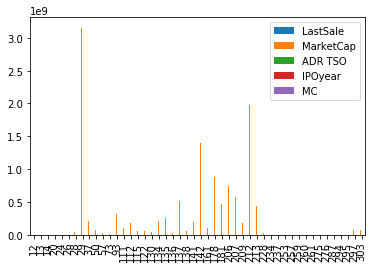

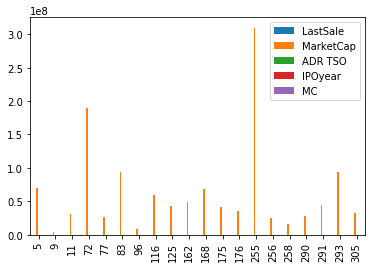

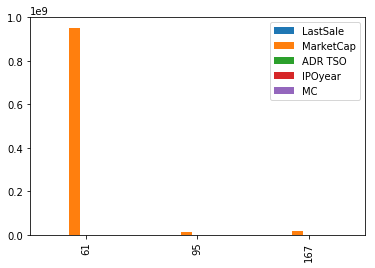

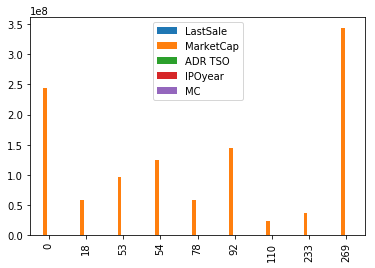

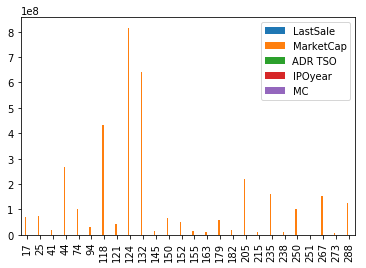

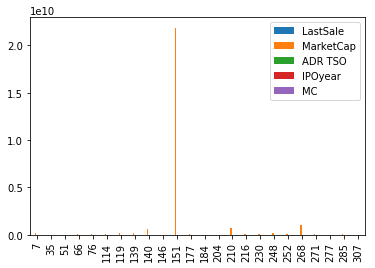

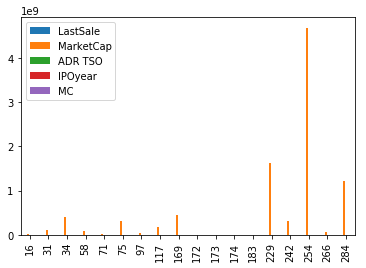

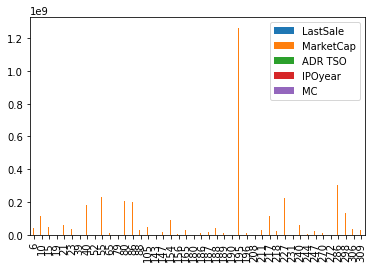

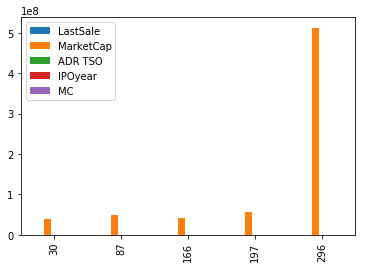

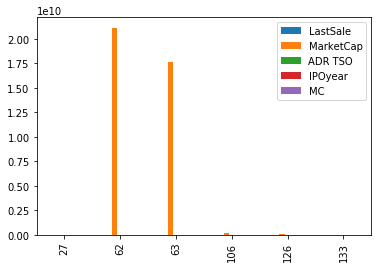

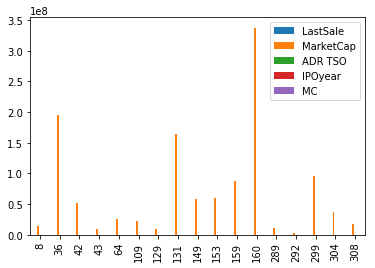

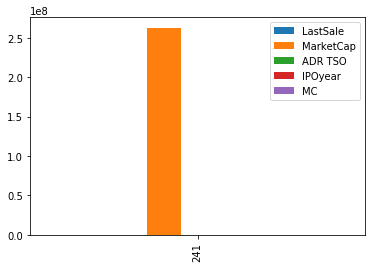

In [111]:
mx_bsec.plot(kind='bar')
plt.show()

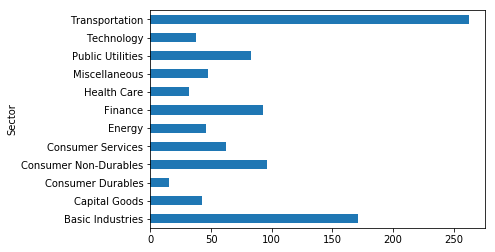

In [112]:
mc_bsec.plot(kind='barh')
plt.show()